In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from mlrose_hiive.opt_probs import TSPOpt, DiscreteOpt
from mlrose_hiive.fitness import TravellingSales, FlipFlop, ContinuousPeaks,Knapsack,Queens,OneMax, MaxKColor
import random
from tqdm import tqdm
plt.style.use('seaborn-darkgrid')

In [2]:
from mlrose_hiive.algorithms import random_hill_climb, simulated_annealing, genetic_alg, mimic
from mlrose_hiive.algorithms.decay import ExpDecay

IMAGE_DIR = '../figures/Optimization/'

In [3]:
start_time = 0.
times = []

def time_callback(iteration, attempt=None, done=None, state=None, fitness=None, fitness_evaluations=None,curve=None, user_data=None):
    """Time callback for saving time elapsed at each iteration of the algorithm.
        Args:
          iteration (int): current iteration.
          attempt (int): current attempt.
          done (bool): id we are done iterating.
          state (list): current best state.
          fitness (float): current best fitness.
          curve (ndarray): current fitness curve.
          user_data (any): current iteration.
        Returns:
          continue (bool): True, to continue iterating.
        """
    # Define global variables
    global start_time, times

    # At first iteration, save start time and reset list of times, else save time elapsed since start
    if iteration == 0:
        start_time = time.time()
        times = []
    else:
        times.append(time.time() - start_time)

    # Return always True to continue iterating
    return True

## Contiuous Peaks

### Fitness vs N

In [239]:
random_state = 32
lengths = np.arange(20,301,20)
best_fitnesses = np.zeros((4,len(lengths)))
max_attempts = 50
times = np.zeros_like(best_fitnesses)
num_evals = np.zeros_like(best_fitnesses)
for i,n in tqdm(enumerate(lengths)):
    # Define Four Peaks objective function and problem
    continous_fitness = ContinuousPeaks(t_pct=0.2)
    problem = DiscreteOpt(length=int(n), fitness_fn=continous_fitness, maximize=True, max_val=2)
    problem.set_mimic_fast_mode(True)  # set fast MIMIC
    
    
    #RHC
    start = time.time()
    _, best_objective, objective_curve = random_hill_climb(problem,max_iters=10000,restarts=20,max_attempts =max_attempts, random_state = random_state,curve=True)
    times[0,i] = time.time() - start 
    best_fitnesses[0,i] = best_objective
    num_evals[0,i] = objective_curve[-1,1]
    
    
    #SA
    start = time.time()
    exp_decay = ExpDecay(init_temp=100,exp_const=0.1,min_temp=0.001)
    _, best_objective, objective_curve = simulated_annealing(problem,schedule=exp_decay,max_iters=10000,max_attempts =max_attempts
                                                            ,curve=True,random_state=random_state)
    times[1,i] = time.time() - start 
    best_fitnesses[1,i] = best_objective
    num_evals[1,i] = objective_curve[-1,1]
    #GA
    start = time.time()
    _, best_objective,objective_curve = genetic_alg(problem,max_iters=10000,max_attempts =max_attempts,pop_size = 500, random_state = random_state,curve=True)
    times[2,i] = time.time() - start 
    best_fitnesses[2,i] = best_objective
    num_evals[2,i] = objective_curve[-1,1]
    
    #Mimic
    start = time.time()
    _, best_objective, objective_curve = mimic(problem,max_iters=10000,curve=True,max_attempts =max_attempts,pop_size = 500,keep_pct=0.5,random_state=random_state)    
    times[3,i] = time.time() - start 
    best_fitnesses[3,i] = best_objective
    num_evals[3,i] = objective_curve[-1,1]
        
    

15it [28:51, 115.46s/it]


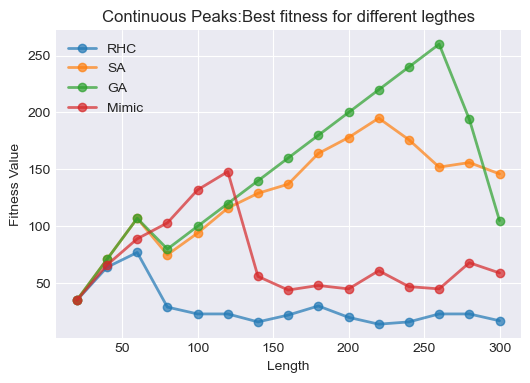

In [240]:
plt.figure(figsize=(6,4))
plt.plot(lengths,best_fitnesses[0],label='RHC', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,best_fitnesses[1],label='SA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,best_fitnesses[2],label='GA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,best_fitnesses[3],label='Mimic', marker='o',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 100])
# ax.set_xscale('log')
plt.title("Continuous Peaks:Best fitness for different legthes")
plt.legend(loc='best')
plt.xlabel("Length")
plt.ylabel("Fitness Value")
plt.savefig(IMAGE_DIR+"CP_fitness_N_max_50.pdf")

In [216]:
random_state = 32
lengths = np.arange(20,301,20)
best_fitnesses = np.zeros((4,len(lengths)))
max_attempts = 5
times = np.zeros_like(best_fitnesses)
num_evals = np.zeros_like(best_fitnesses)
for i,n in tqdm(enumerate(lengths)):
    # Define Four Peaks objective function and problem
    continous_fitness = ContinuousPeaks(t_pct=0.2)
    problem = DiscreteOpt(length=int(n), fitness_fn=continous_fitness, maximize=True, max_val=2)
    problem.set_mimic_fast_mode(True)  # set fast MIMIC
    
    
    #RHC
    start = time.time()
    _, best_objective, objective_curve = random_hill_climb(problem,max_iters=10000,restarts=20,max_attempts =max_attempts, random_state = random_state,curve=True)
    times[0,i] = time.time() - start 
    best_fitnesses[0,i] = best_objective
    num_evals[0,i] = objective_curve[-1,1]
    
    
    #SA
    start = time.time()
    exp_decay = ExpDecay(init_temp=100,exp_const=0.1,min_temp=0.001)
    _, best_objective, objective_curve = simulated_annealing(problem,schedule=exp_decay,max_iters=10000,max_attempts =max_attempts
                                                            ,curve=True,random_state=random_state)
    times[1,i] = time.time() - start 
    best_fitnesses[1,i] = best_objective
    num_evals[1,i] = objective_curve[-1,1]
    #GA
    start = time.time()
    _, best_objective,objective_curve = genetic_alg(problem,max_iters=10000,max_attempts =max_attempts,pop_size = 500, random_state = random_state,curve=True)
    times[2,i] = time.time() - start 
    best_fitnesses[2,i] = best_objective
    num_evals[2,i] = objective_curve[-1,1]
    
    #Mimic
    start = time.time()
    _, best_objective, objective_curve = mimic(problem,max_iters=10000,curve=True,max_attempts =max_attempts,pop_size = 500,keep_pct=0.5,random_state=random_state)    
    times[3,i] = time.time() - start 
    best_fitnesses[3,i] = best_objective
    num_evals[3,i] = objective_curve[-1,1]
        
    

15it [01:45,  7.03s/it]


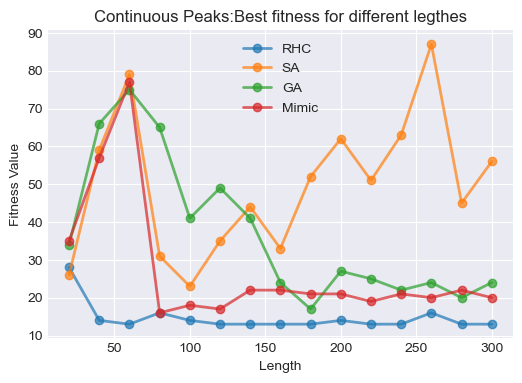

In [217]:
plt.figure(figsize=(6,4))
plt.plot(lengths,best_fitnesses[0],label='RHC', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,best_fitnesses[1],label='SA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,best_fitnesses[2],label='GA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,best_fitnesses[3],label='Mimic', marker='o',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 100])
# ax.set_xscale('log')
plt.title("Continuous Peaks:Best fitness for different legthes")
plt.legend(loc='best')
plt.xlabel("Length")
plt.ylabel("Fitness Value")
plt.savefig(IMAGE_DIR+"CP_fitness_N.pdf")

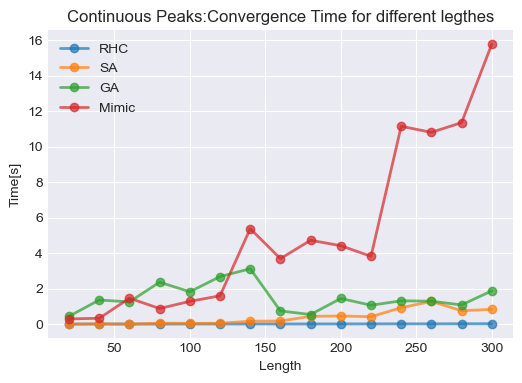

In [218]:
plt.figure(figsize=(6,4))
plt.plot(lengths,times[0],label='RHC', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,times[1],label='SA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,times[2],label='GA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,times[3],label='Mimic', marker='o',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 100])
# ax.set_xscale('log')
plt.title("Continuous Peaks:Convergence Time for different legthes")
plt.legend(loc='best')
plt.xlabel("Length")
plt.ylabel("Time[s]")
plt.savefig(IMAGE_DIR+"CP_convergence.pdf")

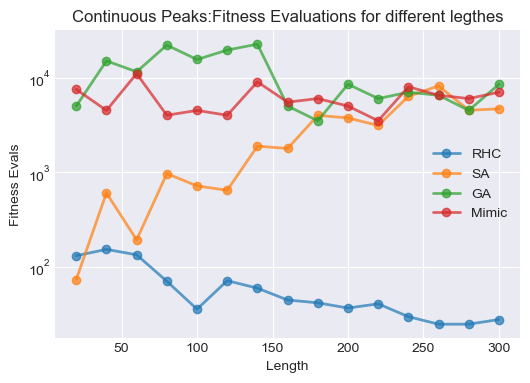

In [219]:
plt.figure(figsize=(6,4))
plt.plot(lengths,num_evals[0],label='RHC', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,num_evals[1],label='SA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,num_evals[2],label='GA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,num_evals[3],label='Mimic', marker='o',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 100])
ax.set_yscale('log')
plt.title("Continuous Peaks:Fitness Evaluations for different legthes")
plt.legend(loc='best')
plt.xlabel("Length")
plt.ylabel("Fitness Evals")
plt.savefig(IMAGE_DIR+"CP_eval_N.pdf")

In [246]:
### fitness curve 
curves = []
time_curves = []
random_state = 32
max_attempts = 5
continous_fitness = ContinuousPeaks(t_pct=0.2)
problem = DiscreteOpt(length=200, fitness_fn=continous_fitness, maximize=True, max_val=2)
problem.set_mimic_fast_mode(True)  # set fast MIMIC


#RHC
start = time.time()
_, best_objective, objective_curve = random_hill_climb(problem,max_iters=10000,restarts=20,max_attempts=max_attempts,random_state = random_state,curve=True,
                                                      state_fitness_callback=time_callback,
                                                        callback_user_info=[])
print("RHC fitness: ",best_objective)
print("Time: ", time.time()-start)
print("num of iterations: ", len(objective_curve))
curves.append(objective_curve) 
time_curves.append(times)

#SA
start = time.time()
exp_decay = ExpDecay(init_temp=200,exp_const=0.2,min_temp=0.001)
_, best_objective, objective_curve = simulated_annealing(problem,schedule=exp_decay,max_iters=10000
                                                         ,curve=True,random_state=random_state,max_attempts= max_attempts,
                                                        state_fitness_callback=time_callback,
                                                        callback_user_info=[])
print("SA fitness: ",best_objective)
print("Time: ", time.time()-start)
print("num of iterations: ", len(objective_curve))

curves.append(objective_curve) 
time_curves.append(times)

#GA
start = time.time()
_, best_objective,objective_curve = genetic_alg(problem,max_iters=10000, max_attempts= max_attempts,random_state = random_state,curve=True,
                                               state_fitness_callback=time_callback, pop_size = 500,
                                                        callback_user_info=[])
curves.append(objective_curve) 
time_curves.append(times)
print("GA fitness: ",best_objective)
print("Time: ", time.time()-start)
print("num of iterations: ", len(objective_curve))


#Mimic
start = time.time()
_, best_objective, objective_curve = mimic(problem,max_iters=10000,max_attempts=max_attempts,curve=True,random_state=random_state,
                                          state_fitness_callback=time_callback,keep_pct = 0.5, pop_size = 500,
                                                        callback_user_info=[])    
curves.append(objective_curve) 
time_curves.append(times)
print("Mimic fitness: ",best_objective)
print("Time: ", time.time()-start)
print("num of iterations: ", len(objective_curve))



RHC fitness:  14.0
Time:  0.03200268745422363
num of iterations:  6
SA fitness:  62.0
Time:  1.9366731643676758
num of iterations:  2082
GA fitness:  27.0
Time:  1.6023938655853271
num of iterations:  16
Mimic fitness:  21.0
Time:  4.653494119644165
num of iterations:  9


In [221]:
objective_curve[-1,1]

17042.0

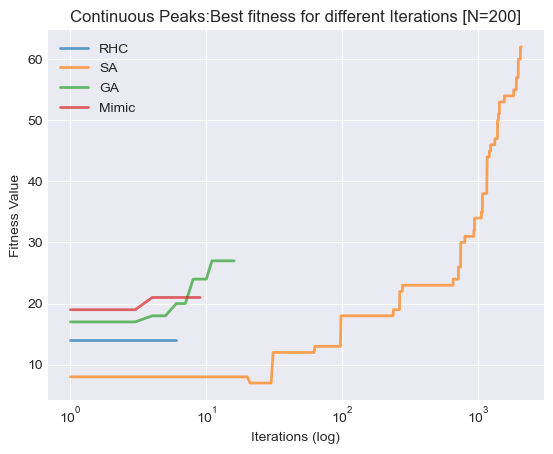

In [245]:
iterations = np.arange(1,10001+1)
plt.plot(np.arange(1,len(curves[0][:,0])+1),curves[0][:,0],label='RHC',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(curves[1][:,0])+1),curves[1][:,0],label='SA',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(curves[2][:,0])+1),curves[2][:,0],label='GA',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(curves[3][:,0])+1),curves[3][:,0],label='Mimic',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 100])
# ax.set_xlim([1, 10001])
ax.set_xscale('log')
plt.title("Continuous Peaks:Best fitness for different Iterations [N=200]")
plt.legend(loc='best')
plt.xlabel("Iterations (log)")
plt.ylabel("Fitness Value")
plt.savefig(IMAGE_DIR+"CP_fitness_iterations.pdf")

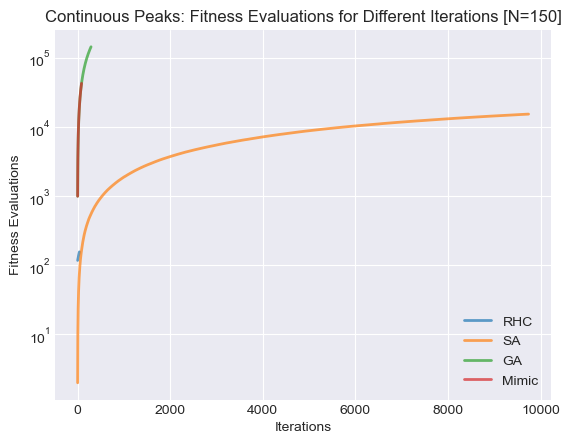

In [214]:
iterations = np.arange(1,10001+1)
plt.plot(np.arange(1,len(curves[0][:,1])+1),curves[0][:,1],label='RHC',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(curves[1][:,1])+1),curves[1][:,1],label='SA',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(curves[2][:,1])+1),curves[2][:,1],label='GA',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(curves[3][:,1])+1),curves[3][:,1],label='Mimic',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 100])
# ax.set_xlim([1, 10001])
#ax.set_xscale('log')
ax.set_yscale('log')
plt.title("Continuous Peaks: Fitness Evaluations for Different Iterations [N=150]")
plt.legend(loc='best')
plt.xlabel("Iterations")
plt.ylabel("Fitness Evaluations")
plt.savefig(IMAGE_DIR+"CP_fitnessEval_iterations.pdf")

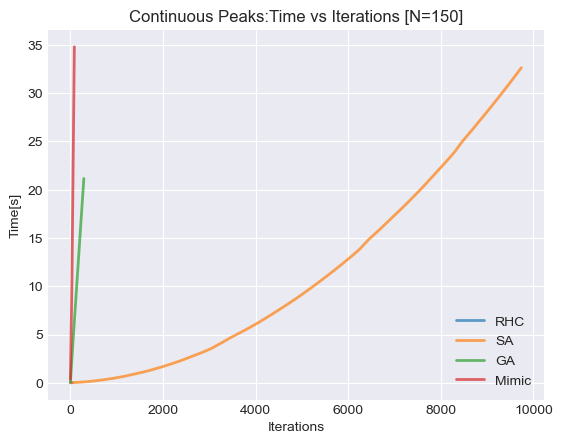

In [215]:
iterations = np.arange(1,10001+1)
plt.plot(np.arange(1,len(time_curves[0])+1),time_curves[0],label='RHC',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(time_curves[1])+1),time_curves[1],label='SA',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(time_curves[2])+1),time_curves[2],label='GA',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(time_curves[3])+1),time_curves[3],label='Mimic',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 100])
# ax.set_xlim([1, 10001])
# ax.set_xscale('log')
plt.title("Continuous Peaks:Time vs Iterations [N=150]")
plt.legend(loc='best')
plt.xlabel("Iterations")
plt.ylabel("Time[s]")
plt.savefig(IMAGE_DIR+"CP_time_iterations.pdf")

In [214]:
random.randint(1,10)

9

### Knapsack

In [217]:
num_points = 10
max_weight_pct = 0.4
weights = list(np.random.randint(low = 1, high = 100, size = num_points))
values = list(np.random.randint(low = 1, high = 100, size = num_points))
problem = DiscreteOpt(length = num_points,fitness_fn = Knapsack(weights,values,max_weight_pct))
problem.set_mimic_fast_mode(True)  # set fast MIMIC

In [237]:
random_state = 32
num_points_array = np.arange(20,351,20)
best_fitnesses = np.zeros((4,len(num_points_array)))
max_attempts = 50
times = np.zeros_like(best_fitnesses)
num_evals = np.zeros_like(best_fitnesses)
for i,num_points in tqdm(enumerate(num_points_array)):
    max_weight_pct = 0.4
    weights = list(np.random.randint(low = 1, high = 100, size = num_points))
    values = list(np.random.randint(low = 1, high = 100, size = num_points))
    problem = DiscreteOpt(length = int(num_points),fitness_fn = Knapsack(weights,values,max_weight_pct))
    problem.set_mimic_fast_mode(True)  # set fast MIMIC
    
    
    #RHC
    start = time.time()
    _, best_objective, objective_curve = random_hill_climb(problem,max_iters=10000,max_attempts=max_attempts, restarts=20,random_state = random_state,curve=True)
    times[0,i]= time.time()- start
    num_evals[0,i] = objective_curve[-1,1]
    best_fitnesses[0,i] = best_objective
    
    #SA
    exp_decay = ExpDecay(init_temp=100,exp_const=0.1,min_temp=0.001)
    start = time.time()
    _, best_objective, objective_curve = simulated_annealing(problem,schedule=exp_decay,max_iters=10000,max_attempts=max_attempts
                                                             ,curve=True,random_state=random_state)
    times[1,i]= time.time()- start
    num_evals[1,i] = objective_curve[-1,1]
    best_fitnesses[1,i] = best_objective
    #GA
    start = time.time()
    _, best_objective,objective_curve = genetic_alg(problem,max_iters=10000,max_attempts=max_attempts,pop_size = 500, random_state = random_state,curve=True)
    times[2,i]= time.time()- start
    num_evals[2,i] = objective_curve[-1,1]
    best_fitnesses[2,i] = best_objective
    #Mimic
    start = time.time()
    _, best_objective, objective_curve = mimic(problem,max_iters=10000,curve=True,max_attempts=max_attempts,keep_pct = 0.5, pop_size = 500,random_state=random_state)    
    times[3,i]= time.time()- start
    num_evals[3,i] = objective_curve[-1,1]
    best_fitnesses[3,i] = best_objective
        
    

17it [26:44, 94.40s/it] 


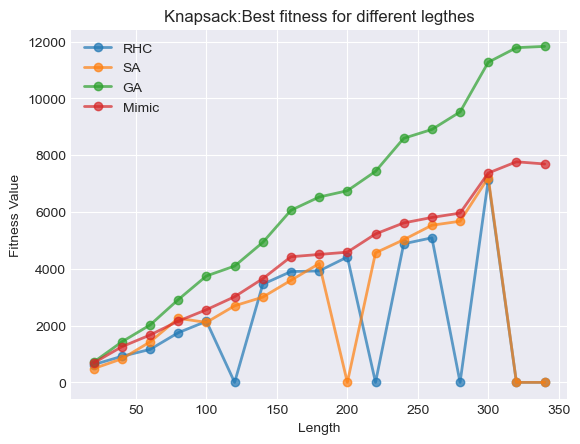

In [238]:
plt.plot(num_points_array,best_fitnesses[0],label='RHC', marker='o',  linewidth=2, alpha=0.7)
plt.plot(num_points_array,best_fitnesses[1],label='SA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(num_points_array,best_fitnesses[2],label='GA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(num_points_array,best_fitnesses[3],label='Mimic', marker='o',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 100])
# ax.set_yscale('log')
plt.title("Knapsack:Best fitness for different legthes")
plt.legend(loc='best')
plt.xlabel("Length")
plt.ylabel("Fitness Value")
plt.savefig(IMAGE_DIR+"KP_fitness_N_max_50.pdf")

In [223]:
random_state = 32
num_points_array = np.arange(20,351,20)
best_fitnesses = np.zeros((4,len(num_points_array)))
max_attempts = 5
times = np.zeros_like(best_fitnesses)
num_evals = np.zeros_like(best_fitnesses)
for i,num_points in tqdm(enumerate(num_points_array)):
    max_weight_pct = 0.4
    weights = list(np.random.randint(low = 1, high = 100, size = num_points))
    values = list(np.random.randint(low = 1, high = 100, size = num_points))
    problem = DiscreteOpt(length = int(num_points),fitness_fn = Knapsack(weights,values,max_weight_pct))
    problem.set_mimic_fast_mode(True)  # set fast MIMIC
    
    
    #RHC
    start = time.time()
    _, best_objective, objective_curve = random_hill_climb(problem,max_iters=10000,max_attempts=max_attempts, restarts=20,random_state = random_state,curve=True)
    times[0,i]= time.time()- start
    num_evals[0,i] = objective_curve[-1,1]
    best_fitnesses[0,i] = best_objective
    
    #SA
    exp_decay = ExpDecay(init_temp=100,exp_const=0.1,min_temp=0.001)
    start = time.time()
    _, best_objective, objective_curve = simulated_annealing(problem,schedule=exp_decay,max_iters=10000,max_attempts=max_attempts
                                                             ,curve=True,random_state=random_state)
    times[1,i]= time.time()- start
    num_evals[1,i] = objective_curve[-1,1]
    best_fitnesses[1,i] = best_objective
    #GA
    start = time.time()
    _, best_objective,objective_curve = genetic_alg(problem,max_iters=10000,max_attempts=max_attempts,pop_size = 500, random_state = random_state,curve=True)
    times[2,i]= time.time()- start
    num_evals[2,i] = objective_curve[-1,1]
    best_fitnesses[2,i] = best_objective
    #Mimic
    start = time.time()
    _, best_objective, objective_curve = mimic(problem,max_iters=10000,curve=True,max_attempts=max_attempts,keep_pct = 0.5, pop_size = 500,random_state=random_state)    
    times[3,i]= time.time()- start
    num_evals[3,i] = objective_curve[-1,1]
    best_fitnesses[3,i] = best_objective
        
    

17it [03:51, 13.64s/it]


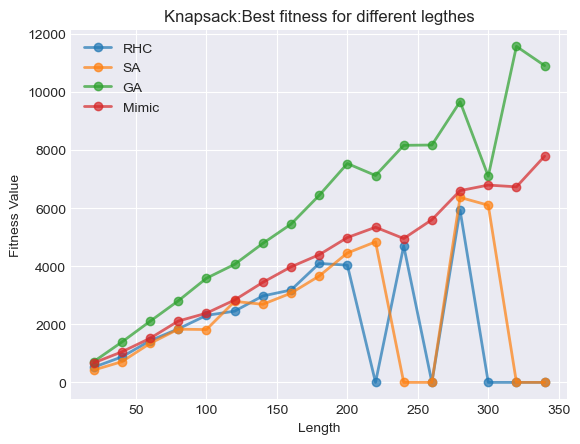

In [224]:
plt.plot(num_points_array,best_fitnesses[0],label='RHC', marker='o',  linewidth=2, alpha=0.7)
plt.plot(num_points_array,best_fitnesses[1],label='SA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(num_points_array,best_fitnesses[2],label='GA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(num_points_array,best_fitnesses[3],label='Mimic', marker='o',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 100])
# ax.set_yscale('log')
plt.title("Knapsack:Best fitness for different legthes")
plt.legend(loc='best')
plt.xlabel("Length")
plt.ylabel("Fitness Value")
plt.savefig(IMAGE_DIR+"KP_fitness_N.pdf")

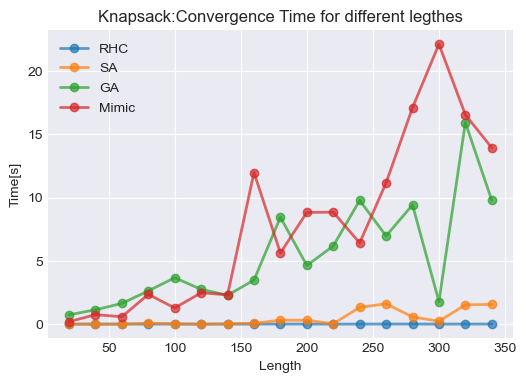

In [225]:
plt.figure(figsize=(6,4))
plt.plot(num_points_array,times[0],label='RHC', marker='o',  linewidth=2, alpha=0.7)
plt.plot(num_points_array,times[1],label='SA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(num_points_array,times[2],label='GA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(num_points_array,times[3],label='Mimic', marker='o',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 100])
# ax.set_xscale('log')
plt.title("Knapsack:Convergence Time for different legthes")
plt.legend(loc='best')
plt.xlabel("Length")
plt.ylabel("Time[s]")
plt.savefig(IMAGE_DIR+"KS_convergence.pdf")

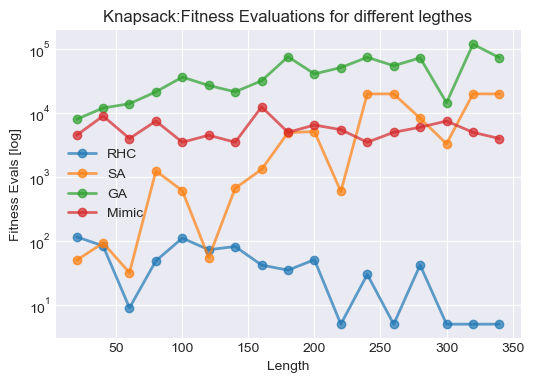

In [226]:
plt.figure(figsize=(6,4))
plt.plot(num_points_array,num_evals[0],label='RHC', marker='o',  linewidth=2, alpha=0.7)
plt.plot(num_points_array,num_evals[1],label='SA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(num_points_array,num_evals[2],label='GA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(num_points_array,num_evals[3],label='Mimic', marker='o',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 100])
ax.set_yscale('log')
plt.title("Knapsack:Fitness Evaluations for different legthes")
plt.legend(loc='best')
plt.xlabel("Length")
plt.ylabel("Fitness Evals [log]")
plt.savefig(IMAGE_DIR+"KS_eval_N.pdf")

In [256]:
### fitness curve 
curves = []
time_curves = []
random_state = 32
max_attempts = 5
num_points = 150
max_weight_pct = 0.4
weights = list(np.random.randint(low = 1, high = 100, size = num_points))
values = list(np.random.randint(low = 1, high = 100, size = num_points))
problem = DiscreteOpt(length = int(num_points),fitness_fn = Knapsack(weights,values,max_weight_pct))
problem.set_mimic_fast_mode(True)  # set fast MIMIC


#RHC
start = time.time()
_, best_objective, objective_curve = random_hill_climb(problem,max_iters=10000,restarts=20,max_attempts=max_attempts,random_state = random_state,curve=True,
                                                      state_fitness_callback=time_callback,
                                                        callback_user_info=[])
print("RHC fitness: ",best_objective)
print("Time: ", time.time()-start)
print("num of iterations: ", len(objective_curve))
curves.append(objective_curve) 
time_curves.append(times)

#SA
start = time.time()
exp_decay = ExpDecay(init_temp=100,exp_const=0.1,min_temp=0.001)
_, best_objective, objective_curve = simulated_annealing(problem,schedule=exp_decay,max_iters=10000
                                                         ,curve=True,random_state=random_state,max_attempts= max_attempts,
                                                        state_fitness_callback=time_callback,
                                                        callback_user_info=[])
print("SA fitness: ",best_objective)
print("Time: ", time.time()-start)
print("num of iterations: ", len(objective_curve))

curves.append(objective_curve) 
time_curves.append(times)

#GA
start = time.time()
_, best_objective,objective_curve = genetic_alg(problem,max_iters=10000, max_attempts= max_attempts,random_state = random_state,curve=True,
                                               state_fitness_callback=time_callback, pop_size = 500,
                                                        callback_user_info=[])
curves.append(objective_curve) 
time_curves.append(times)
print("GA fitness: ",best_objective)
print("Time: ", time.time()-start)
print("num of iterations: ", len(objective_curve))


#Mimic
start = time.time()
_, best_objective, objective_curve = mimic(problem,max_iters=10000,max_attempts=max_attempts,curve=True,random_state=random_state,
                                          state_fitness_callback=time_callback,pop_size = 500,keep_pct=0.5,
                                                        callback_user_info=[])    
curves.append(objective_curve) 
time_curves.append(times)
print("Mimic fitness: ",best_objective)
print("Time: ", time.time()-start)
print("num of iterations: ", len(objective_curve))



RHC fitness:  3372.0
Time:  0.0399320125579834
num of iterations:  10
SA fitness:  3174.0
Time:  0.16176629066467285
num of iterations:  444
GA fitness:  5498.0
Time:  4.857106924057007
num of iterations:  63
Mimic fitness:  3932.0
Time:  4.359586715698242
num of iterations:  7


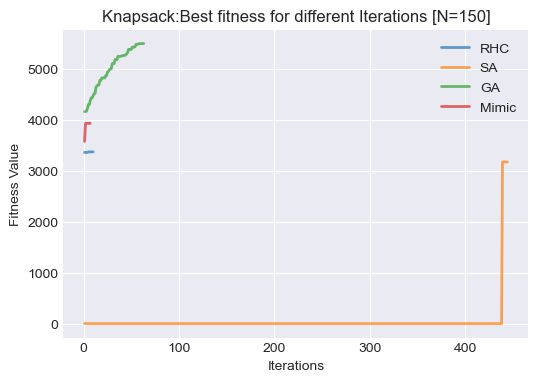

In [257]:
plt.figure(figsize=(6,4))
iterations = np.arange(1,10001+1)
plt.plot(np.arange(1,len(curves[0][:,0])+1),curves[0][:,0],label='RHC',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(curves[1][:,0])+1),curves[1][:,0],label='SA',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(curves[2][:,0])+1),curves[2][:,0],label='GA',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(curves[3][:,0])+1),curves[3][:,0],label='Mimic',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 5000])
# ax.set_xlim([1, 10001])
# ax.set_yscale('log')
plt.title("Knapsack:Best fitness for different Iterations [N={}]".format(num_points))
plt.legend(loc='best')
plt.xlabel("Iterations")
plt.ylabel("Fitness Value")
plt.savefig(IMAGE_DIR+"KS_fitness_iterations.pdf")

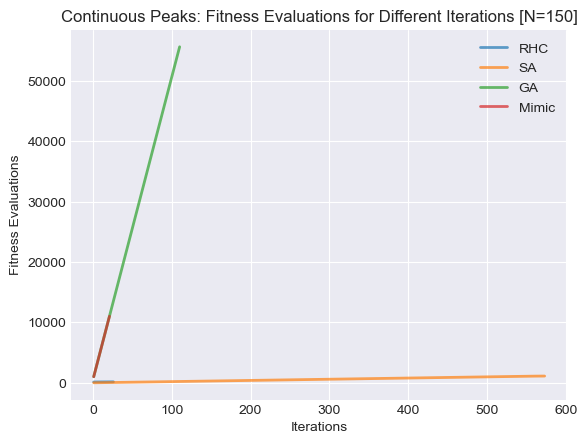

In [154]:
iterations = np.arange(1,10001+1)
plt.plot(np.arange(1,len(curves[0][:,1])+1),curves[0][:,1],label='RHC',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(curves[1][:,1])+1),curves[1][:,1],label='SA',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(curves[2][:,1])+1),curves[2][:,1],label='GA',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(curves[3][:,1])+1),curves[3][:,1],label='Mimic',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 100])
# ax.set_xlim([1, 10001])
# ax.set_xscale('log')
plt.title("Continuous Peaks: Fitness Evaluations for Different Iterations [N=150]")
plt.legend(loc='best')
plt.xlabel("Iterations")
plt.ylabel("Fitness Evaluations")
plt.savefig(IMAGE_DIR+"KS_fitnessEval_iterations.pdf")

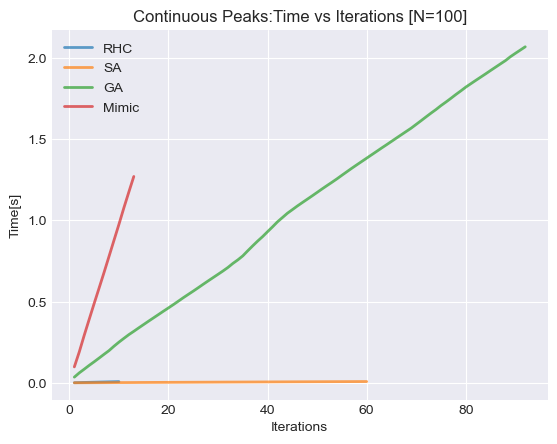

In [242]:
iterations = np.arange(1,10001+1)
plt.plot(np.arange(1,len(time_curves[0])+1),time_curves[0],label='RHC',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(time_curves[1])+1),time_curves[1],label='SA',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(time_curves[2])+1),time_curves[2],label='GA',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(time_curves[3])+1),time_curves[3],label='Mimic',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 100])
# ax.set_xlim([1, 10001])
# ax.set_xscale('log')
plt.title("Continuous Peaks:Time vs Iterations [N={}]".format(num_points))
plt.legend(loc='best')
plt.xlabel("Iterations")
plt.ylabel("Time[s]")
plt.savefig(IMAGE_DIR+"KS_time_iterations.pdf")

## Flip Flop

In [6]:
random_state = 32

In [7]:
flip_flop = FlipFlop()
problem = DiscreteOpt(length=200, fitness_fn=flip_flop, maximize=True, max_val=2)
problem.set_mimic_fast_mode(True)  # set fast MIMIC

pop_sizes = [50,100,200,500]
keep_pcts = [0.1,0.3,0.5,0.7,0.9]
fitnesses = np.zeros((len(pop_sizes),len(keep_pcts)))
for i, pop in tqdm(enumerate(pop_sizes)):
    for j,ptc in enumerate(keep_pcts):
        _, best_objective, objective_curve = mimic(problem,curve=False,pop_size=pop,keep_pct =ptc,max_iters=10000,max_attempts=5,random_state = random_state)
        fitnesses[i,j] = best_objective


4it [07:56, 119.13s/it]


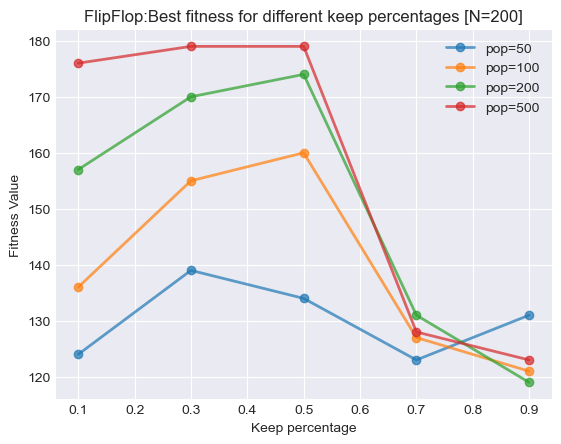

In [8]:
plt.plot(keep_pcts,fitnesses[0],label='pop=50', marker='o',  linewidth=2, alpha=0.7)
plt.plot(keep_pcts,fitnesses[1],label='pop=100', marker='o',  linewidth=2, alpha=0.7)
plt.plot(keep_pcts,fitnesses[2],label='pop=200', marker='o',  linewidth=2, alpha=0.7)
plt.plot(keep_pcts,fitnesses[3],label='pop=500', marker='o',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 100])
# ax.set_yscale('log')
plt.title("FlipFlop:Best fitness for different keep percentages [N=200]")
plt.legend(loc='best')
plt.xlabel("Keep percentage")
plt.ylabel("Fitness Value")
plt.savefig(IMAGE_DIR+"FP_mimic_params.pdf")

In [9]:
random_state = 32
lengths = np.arange(50,401,50)
best_fitnesses = np.zeros((4,len(lengths)))
max_attempts = 5
times = np.zeros_like(best_fitnesses)
num_evals = np.zeros_like(best_fitnesses)
for i,n in tqdm(enumerate(lengths)):
    flip_flop = FlipFlop()
    problem = DiscreteOpt(length=int(n), fitness_fn=flip_flop, maximize=True, max_val=2)
    problem.set_mimic_fast_mode(True)  # set fast MIMIC
    
    
    #RHC
    start = time.time()
    _, best_objective, objective_curve =random_hill_climb(problem,max_iters=10000,max_attempts=max_attempts, restarts=20,random_state = random_state,curve=True)
    times[0,i] = time.time() - start 
    best_fitnesses[0,i] = best_objective
    num_evals[0,i] = objective_curve[-1,1]
    
    
    #SA
    start = time.time()
    exp_decay = ExpDecay(init_temp=100,exp_const=0.1,min_temp=0.001)
    _, best_objective, objective_curve = simulated_annealing(problem,curve=True,max_iters=10000,max_attempts=max_attempts,random_state = random_state)
    times[1,i] = time.time() - start 
    best_fitnesses[1,i] = best_objective
    num_evals[1,i] = objective_curve[-1,1]
    #GA
    start = time.time()
    _, best_objective,objective_curve = genetic_alg(problem,pop_size=500,curve=True,max_iters=10000,max_attempts=max_attempts, random_state = random_state)
    times[2,i] = time.time() - start 
    best_fitnesses[2,i] = best_objective
    num_evals[2,i] = objective_curve[-1,1]
    
    #Mimic
    start = time.time()
    _, best_objective, objective_curve = mimic(problem,curve=True,pop_size=500,keep_pct =0.3,max_iters=10000,max_attempts=max_attempts,random_state = random_state)    
    times[3,i] = time.time() - start 
    best_fitnesses[3,i] = best_objective
    num_evals[3,i] = objective_curve[-1,1]
        
    

8it [06:40, 50.06s/it]


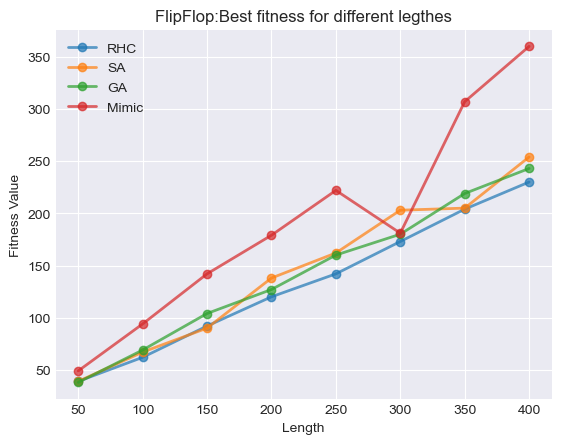

In [10]:
plt.plot(lengths,best_fitnesses[0],label='RHC', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,best_fitnesses[1],label='SA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,best_fitnesses[2],label='GA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,best_fitnesses[3],label='Mimic', marker='o',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 100])
# ax.set_yscale('log')
plt.title("FlipFlop:Best fitness for different legthes")
plt.legend(loc='best')
plt.xlabel("Length")
plt.ylabel("Fitness Value")
plt.savefig(IMAGE_DIR+"FP_fitness_N_max_5.pdf")

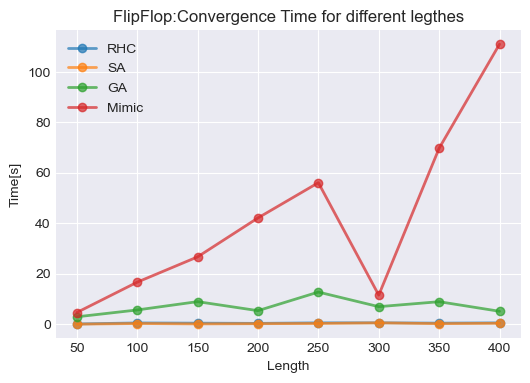

In [11]:
plt.figure(figsize=(6,4))
plt.plot(lengths,times[0],label='RHC', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,times[1],label='SA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,times[2],label='GA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,times[3],label='Mimic', marker='o',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 100])
# ax.set_xscale('log')
plt.title("FlipFlop:Convergence Time for different legthes")
plt.legend(loc='best')
plt.xlabel("Length")
plt.ylabel("Time[s]")
plt.savefig(IMAGE_DIR+"FP_convergence_max_5.pdf")

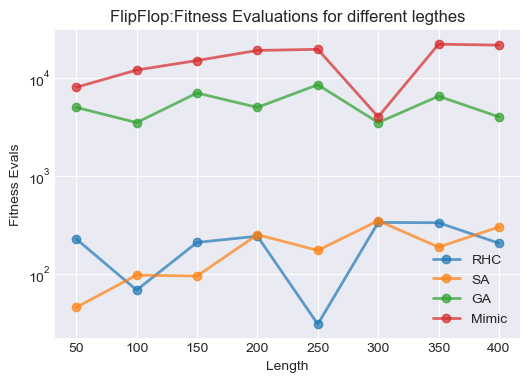

In [12]:
plt.figure(figsize=(6,4))
plt.plot(lengths,num_evals[0],label='RHC', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,num_evals[1],label='SA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,num_evals[2],label='GA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,num_evals[3],label='Mimic', marker='o',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 100])
ax.set_yscale('log')
plt.title("FlipFlop:Fitness Evaluations for different legthes")
plt.legend(loc='best')
plt.xlabel("Length")
plt.ylabel("Fitness Evals")
plt.savefig(IMAGE_DIR+"FP_eval_N__max_5.pdf")

In [13]:
### fitness curve 
curves = []
time_curves = []
random_state = 32
max_attempts = 5
flip_flop = FlipFlop()
problem = DiscreteOpt(length=350, fitness_fn=flip_flop, maximize=True, max_val=2)
problem.set_mimic_fast_mode(True)  # set fast MIMIC


#RHC
start = time.time()
_, best_objective, objective_curve = random_hill_climb(problem,max_iters=10000,restarts=20,max_attempts=max_attempts,random_state = random_state,curve=True,
                                                      state_fitness_callback=time_callback,
                                                        callback_user_info=[])
print("RHC fitness: ",best_objective)
print("Time: ", time.time()-start)
print("num of iterations: ", len(objective_curve))
curves.append(objective_curve) 
time_curves.append(times)

#SA
start = time.time()
exp_decay = ExpDecay(init_temp=100,exp_const=0.1,min_temp=0.001)
_, best_objective, objective_curve = simulated_annealing(problem,schedule=exp_decay,max_iters=10000
                                                         ,curve=True,random_state=random_state,max_attempts= max_attempts,
                                                        state_fitness_callback=time_callback,
                                                        callback_user_info=[])
print("SA fitness: ",best_objective)
print("Time: ", time.time()-start)
print("num of iterations: ", len(objective_curve))

curves.append(objective_curve) 
time_curves.append(times)

#GA
start = time.time()
_, best_objective,objective_curve = genetic_alg(problem,max_iters=10000, max_attempts= max_attempts,random_state = random_state,curve=True,
                                               state_fitness_callback=time_callback, pop_size = 500,
                                                        callback_user_info=[])
curves.append(objective_curve) 
time_curves.append(times)
print("GA fitness: ",best_objective)
print("Time: ", time.time()-start)
print("num of iterations: ", len(objective_curve))


#Mimic
start = time.time()
_, best_objective, objective_curve = mimic(problem,max_iters=10000,max_attempts=max_attempts,curve=True,random_state=random_state,
                                          state_fitness_callback=time_callback,pop_size = 500,keep_pct=0.5,
                                                        callback_user_info=[])    
curves.append(objective_curve) 
time_curves.append(times)
print("Mimic fitness: ",best_objective)
print("Time: ", time.time()-start)
print("num of iterations: ", len(objective_curve))



RHC fitness:  204.0
Time:  0.414229154586792
num of iterations:  35
SA fitness:  191.0
Time:  0.2227020263671875
num of iterations:  113
GA fitness:  219.0
Time:  7.5533998012542725
num of iterations:  12
Mimic fitness:  310.0
Time:  121.30506300926208
num of iterations:  62


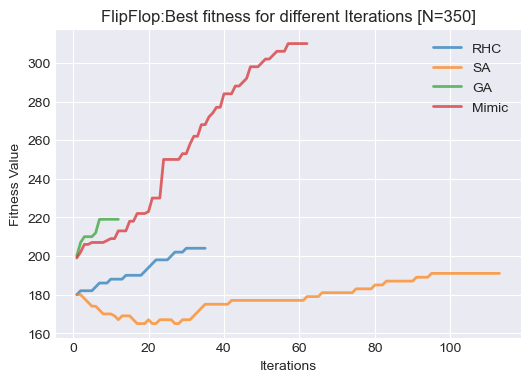

In [15]:
plt.figure(figsize=(6,4))
iterations = np.arange(1,10001+1)
plt.plot(np.arange(1,len(curves[0][:,0])+1),curves[0][:,0],label='RHC',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(curves[1][:,0])+1),curves[1][:,0],label='SA',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(curves[2][:,0])+1),curves[2][:,0],label='GA',  linewidth=2, alpha=0.7)
plt.plot(np.arange(1,len(curves[3][:,0])+1),curves[3][:,0],label='Mimic',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 100])
# ax.set_xlim([1, 10001])
# ax.set_yscale('log')
plt.title("FlipFlop:Best fitness for different Iterations [N=350]")
plt.legend(loc='best')
plt.xlabel("Iterations")
plt.ylabel("Fitness Value")
plt.savefig(IMAGE_DIR+"FP_fitness_iterations.pdf")

In [ ]:
random_state = 32
lengths = np.arange(50,401,50)
best_fitnesses = np.zeros((4,len(lengths)))
max_attempts = 50
times = np.zeros_like(best_fitnesses)
num_evals = np.zeros_like(best_fitnesses)
for i,n in tqdm(enumerate(lengths)):
    flip_flop = FlipFlop()
    problem = DiscreteOpt(length=int(n), fitness_fn=flip_flop, maximize=True, max_val=2)
    problem.set_mimic_fast_mode(True)  # set fast MIMIC
    
    
    #RHC
    start = time.time()
    _, best_objective, objective_curve =random_hill_climb(problem,max_iters=10000,max_attempts=max_attempts, restarts=20,random_state = random_state,curve=True)
    times[0,i] = time.time() - start 
    best_fitnesses[0,i] = best_objective
    num_evals[0,i] = objective_curve[-1,1]
    
    
    #SA
    start = time.time()
    exp_decay = ExpDecay(init_temp=100,exp_const=0.1,min_temp=0.001)
    _, best_objective, objective_curve = simulated_annealing(problem,curve=True,max_iters=10000,max_attempts=max_attempts,random_state = random_state)
    times[1,i] = time.time() - start 
    best_fitnesses[1,i] = best_objective
    num_evals[1,i] = objective_curve[-1,1]
    #GA
    start = time.time()
    _, best_objective,objective_curve = genetic_alg(problem,pop_size=500,curve=True,max_iters=10000,max_attempts=max_attempts, random_state = random_state)
    times[2,i] = time.time() - start 
    best_fitnesses[2,i] = best_objective
    num_evals[2,i] = objective_curve[-1,1]
    
    #Mimic
    start = time.time()
    _, best_objective, objective_curve = mimic(problem,curve=True,pop_size=500,keep_pct =0.3,max_iters=10000,max_attempts=max_attempts,random_state = random_state)    
    times[3,i] = time.time() - start 
    best_fitnesses[3,i] = best_objective
    num_evals[3,i] = objective_curve[-1,1]
        
    

In [ ]:
plt.plot(lengths,best_fitnesses[0],label='RHC', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,best_fitnesses[1],label='SA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,best_fitnesses[2],label='GA', marker='o',  linewidth=2, alpha=0.7)
plt.plot(lengths,best_fitnesses[3],label='Mimic', marker='o',  linewidth=2, alpha=0.7)
ax = plt.gca()
# ax.set_ylim([0, 100])
# ax.set_yscale('log')
plt.title("FlipFlop:Best fitness for different legthes")
plt.legend(loc='best')
plt.xlabel("Length")
plt.ylabel("Fitness Value")
plt.savefig(IMAGE_DIR+"FP_fitness_N_max_50.pdf")